In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 29.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")
NER.max_length = 1500000

In [4]:
import os
#Get txt file from data folder
book_data = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
book_data

[<DirEntry 'A-Song-of-Ice-and-Fire-2-_-Martin_-George-R.-R.-A-Clash-of-Kings-libgen.li.txt'>,
 <DirEntry 'A-Song-of-Ice-and-Fire-A-Targaryen-History-_-Martin_-George-R.R.txt'>]

In [6]:
book = book_data[1]
book_text = open(book, encoding="utf-8").read()
book_doc = NER(book_text)

In [7]:

# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

# Load character names

In [8]:
character_df = pd.read_csv("characters.csv")

In [9]:
# Remove brackets and text within brackets for names wit (extra information) behind it
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
#filter firstname from names
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [10]:
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0             character  \
0            0    Boremund Baratheon   
1            1      Borros Baratheon   
2            2       Ellyn Baratheon   
3            3      Floris Baratheon   
4            4        Randyll Barret   
5            5        Lyman Beesbury   
6            6        Jerrel Bracken   
7            7               Caraxes   
8            8         Arryk Cargyll   
9            9         Erryk Cargyll   
10          10         Desmond Caron   
11          11           Royce Caron   
12          12                 Cole    
13          13          Criston Cole   
14          14           Qarl Correy   
15          15       Steffon Darklyn   
16          16      Arlan Dondarrion   
17          17  Dragonkeeper Acolyte   
18          18    Dragonkeeper Elder   
19          19             Dreamfyre   
20          20              Gerardys   
21          21        Reggio Haratis   
22          22          High Septon    
23          23     Alicent Hightower   
24          24      Gwayne Hightower   
25          25      Hobert Hightower   
26          26     Lynesse Hightower   
27          27        Otto Hightower   
28          28       Joselyn Redwyne   
29          29                Kelvyn   
30          30       Brett Lannister   
31          31       Ceira Lannister   
32          32       Jason Lannister   
33          33      Tyland Lannister   
34          34      Joffrey Lonmouth   
35          35      Lymond Mallister   
36          36       Rymun Mallister   
37          37       Lorent Marbrand   
38          38                Marlow   
39          39               Massey    
40          40         Elinda Massey   
41          41         Gormon Massey   
42          42     Master of Revels    
43          43                Meleys   
44          44                Mellos   
45          45         Merryweather    
46          46                Mickon   
47          47               Mysaria   
48          48                Orwyle   
49          49            Rhea Royce   
50          50               Samwell   
51          51              Seasmoke   
52          52         Howland Sharp   
53          53         Rickon Stark    
54          54           Stokeworth    
55          55     Elinor Stokeworth   
56          56         Harwin Strong   
57          57          Larys Strong   
58          58         Lyonel Strong   
59          59               Sunfyre   
60          60         Johanna Swann   
61          61                 Syrax   
62          62      Aegon Targaryen    
63          63      Aemond Targaryen   
64          64       Baela Targaryen   
65          65      Daemon Targaryen   
66          66     Helaena Targaryen   
67          67      Rhaena Targaryen   
68          68    Rhaenyra Targaryen   
69          69     Rhaenys Targaryen   
70          70   Viserys I Targaryen   
71          71               Tyraxes   
72          72       Corlys Velaryon   
73          73     Jacaerys Velaryon   
74          74        Laena Velaryon   
75          75       Laenor Velaryon   
76          76      Lucerys Velaryon   
77          77      Vaemond Velaryon   
78          78                Vhagar   
79          79    Harrold Westerling   
80          80             Wet nurse   
81          81          Jasper Wylde   

                                                  url character_firstname  
0   https://gameofthrones.fandom.com/wiki/Boremund...            Boremund  
1   https://gameofthrones.fandom.com/wiki/Borros_B...              Borros  
2   https://gameofthrones.fandom.com/wiki/Ellyn_Ba...               Ellyn  
3   https://gameofthrones.fandom.com/wiki/Floris_B...              Floris  
4   https://gameofthrones.fandom.com/wiki/Randyll_...             Randyll  
5   https://gameofthrones.fandom.com/wiki/Lyman_Be...               Lyman  
6   https://gameofthrones.fandom.com/wiki/Jerrel_B...              Jerrel  
7       https://gameofthrones.fandom.com/wiki/Caraxes             Caraxes  

# Get named entity list per sentence

In [11]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [12]:
sent_entity_df

sentence  \
0          (Fire, &, Blood, is, a, work, of, fiction, .)   
1      (Names, ,, places, ,, and, incidents, are, pro...   
2      (Any, resemblance, to, actual, events, ,, loca...   
3      (Copyright, ©, 2018, by, George, R., R., Marti...   
4      (Published, in, the, United, States, by, Banta...   
5      (BANTAM, BOOKS, and, the, HOUSE, colophon, are...   
6      (Portions, of, this, book, were, previously, p...   
7      (Hardback, ISBN,  , 9781524796280, \n\n, Ebook...   
8      (Bastien, Lecouffe, Deharme, \n\n, v5.4, \n\n,...   
9      (Conquest, \n\n, Reign, of, the, Dragon, —, Th...   
10     (I, \n\n, The, Sons, of, the, Dragon, \n\n, Pr...   
11     (AC, \n\n, A, Surfeit, of, Rulers, \n\n, A, Ti...   
12     (Births, ,, deaths, ,, battles, ,, and, other,...   
13     (True, scholars, know, that, such, dating, is,...   
14     (Aegon, Targaryen, ’s, conquest, of, the, Seve...   
15     (More, than, two, years, passed, between, Aego...   
16     (Sporadic, attempts, to, bring, the, Dornishme...   
17     (Even, the, start, date, is, a, matter, of, so...   
18     (Many, assume, ,, wrongly, ,, that, the, reign...   
19                                          (Not, so, .)   
20     (The, day, of, Aegon, ’s, Landing, was, celebr...   
21     (This, coronation, took, place, two, years, af...   
22     (Thus, it, can, be, seen, that, most, of, Aego...   
23     (The, Targaryens, were, of, pure, Valyrian, bl...   
24     (Twelve, years, before, the, Doom, of, Valyria...   
25     (At, its, apex, Valyria, was, the, greatest, c...   
26     (Within, its, shining, walls, ,, twoscore, riv...   
27     (The, Targaryens, were, far, from, the, most, ...   
28     (But, Lord, Aenar, ’s, maiden, daughter, Daeny...   
29     (And, when, the, Doom, came, twelve, years, la...   
30     (Dragonstone, had, been, the, westernmost, out...   
31     (Its, location, athwart, the, Gullet, gave, it...   
32     (Velaryon, ships, ,, along, with, those, of, a...   
33     (Yet, even, so, ,, for, the, best, part, of, a...   
34     (Gaemon, Targaryen, ,, brother, and, husband, ...   
35     (Gaemon, ’s, son, Aegon, and, his, daughter, E...   
36     (After, them, the, lordship, passed, to, their...   
37     (The, last, of, the, three, brothers, was, Dae...   
38     (The, Aegon, who, would, be, known, to, histor...   
39     (He, was, the, only, son, ,, and, second, chil...   
40     (Aegon, had, two, trueborn, siblings, ;, an, e...   
41     (It, had, long, been, the, custom, amongst, th...   
42     (By, tradition, ,, he, would, have, been, expe...   
43     (It, was, said, by, some, that, Aegon, we, d, ...   
44     (All, three, siblings, had, shown, themselves,...   
45     (The, dragons, Vhagar, and, Meraxes, were, you...   
46     (A, common, myth, ,, oft, heard, amongst, the,...   
47     (Years, before, that, sailing, ,, the, Painted...   
48     (Plainly, ,, Aegon, ’s, interest, in, Westeros...   
49     (As, well, ,, there, are, reliable, reports, o...   
50     (He, may, have, visited, Lannisport, as, well,...   
51     (The, Westeros, of, Aegon, ’s, youth, was, div...   
52     (The, vast, ,, cold, ,, stony, North, was, rul...   
53     (In, the, deserts, of, Dorne, ,, the, Martell,...   
54     (The, gold, -, rich, westerlands, were, ruled,...   
55     (The, Vale, ,, the, Fingers, ,, and, the, Moun...   
56     (From, their, great, citadel, ,, Storm, ’s, En...   
57     (The, Kings, of, the, Reach, had, nibbled, at,...   
58     (King, Argilac, ,, last, of, the, Durrandon, ,...   
59     (But, Argilac, had, grown, older, ;, his, famo...   
60     (North, of, the, Blackwater, ,, the, riverland...   
61     (Harren, ’s, ironborn, grandsire, ,, Harwyn, H...   
62     (Harren, ’s, father, had, extended, his, domai...   
63     (Harren, himself, had, devoted, most, of, his,...   
64     (No, king, in, Westeros, was, more, feared, th...   
65     (And, no, king, in, Westeros, felt, more, thre...   
66     (Thus, it, was, that,

In [13]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [15]:
filter_entity(["Boremund", "Thu", "2"], character_df)

['Boremund']

In [16]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
11  (AC, \n\n, A, Surfeit, of, Rulers, \n\n, A, Ti...   
15  (More, than, two, years, passed, between, Aego...   
16  (Sporadic, attempts, to, bring, the, Dornishme...   
20  (The, day, of, Aegon, ’s, Landing, was, celebr...   
21  (This, coronation, took, place, two, years, af...   
22  (Thus, it, can, be, seen, that, most, of, Aego...   
35  (Gaemon, ’s, son, Aegon, and, his, daughter, E...   
38  (The, Aegon, who, would, be, known, to, histor...   
40  (Aegon, had, two, trueborn, siblings, ;, an, e...   
41  (It, had, long, been, the, custom, amongst, th...   

                                             entities character_entities  
11  [Betrayal, Alysanne—Their Triumphs and Tragedi...            [Aegon]  
15  [More than two years, Aegon, Oldtown, Conquest...            [Aegon]  
16                                            [Aegon]            [Aegon]  
20  [Aegon, Conqueror, the day, the Starry Sept of...            [Aegon]  
21    [two years, Aegon, three, the Wars of Conquest]            [Aegon]  
22                              [Aegon, BC, Conquest]            [Aegon]  
35                                            [Aegon]            [Aegon]  
38                             [Aegon, Aegon, 27, BC]     [Aegon, Aegon]  
40                     [Aegon, two, Visenya, Rhaenys]   [Aegon, Rhaenys]  
41                                   [Valyria, Aegon]            [Aegon]

In [17]:
# Take only first name of characters (bvb Aegon,Aegon)
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\domin\AppData\Local\Temp\ipykernel_14908\3854616756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [18]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
11     (AC, \n\n, A, Surfeit, of, Rulers, \n\n, A, Ti...   
15     (More, than, two, years, passed, between, Aego...   
16     (Sporadic, attempts, to, bring, the, Dornishme...   
20     (The, day, of, Aegon, ’s, Landing, was, celebr...   
21     (This, coronation, took, place, two, years, af...   
...                                                  ...   
11901  (“, Lord, Stackspear, ,, Lord, Grandison, ,, L...   
11920  (Lineages, and, Family, Tree, \n\n\n\n\n\n, 1–...   
11922  (131–157, \n\n\n, Aegon, III, \n\n\n\n, the, D...   
11927  (161–171, \n\n\n, Baelor, I, \n\n\n\n, the, Be...   
11928  (184–209, \n\n\n, Daeron, II, \n\n\n\n, the, G...   

                                                entities character_entities  
11     [Betrayal, Alysanne—Their Triumphs and Tragedi...            [Aegon]  
15     [More than two years, Aegon, Oldtown, Conquest...            [Aegon]  
16                                               [Aegon]            [Aegon]  
20     [Aegon, Conqueror, the day, the Starry Sept of...            [Aegon]  
21       [two years, Aegon, three, the Wars of Conquest]            [Aegon]  
...                                                  ...                ...  
11901                          [Grandison, Merryweather]     [Merryweather]  
11920  [1–37, Dragon, 37–42, 42–48, Maegor I, Visenya...         [Rhaenyra]  
11922              [131–157, Aegon III, Rhaenyra, Aegon]  [Rhaenyra, Aegon]  
11927  [161–171, septon, Aegon, 171–172, Viserys II, ...     [Aegon, Aegon]  
11928               [184–209, Daeron II, Aegon, Dornish]            [Aegon]  

[1477 rows x 3 columns]

# Create relationships

In [19]:
window_size = 5
relationships = []
#identify all characters in range of 5 sentences

for i in range(sent_entity_df_filtered.index[-1]):
    #we use min to not exceed the text 
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]#iterate to second last element of list
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [20]:
relationship_df = pd.DataFrame(relationships)

In [21]:
pd.set_option('display.max_rows', None)
relationship_df

source        target
0            Aegon       Rhaenys
1            Aegon       Rhaenys
2          Rhaenys         Aegon
3            Aegon       Rhaenys
4          Rhaenys         Aegon
5            Aegon       Rhaenys
6            Aegon       Rhaenys
7          Rhaenys         Aegon
8            Aegon       Rhaenys
9          Rhaenys         Aegon
10           Aegon       Rhaenys
11           Aegon       Rhaenys
12         Rhaenys         Aegon
13           Aegon       Rhaenys
14         Rhaenys         Aegon
15           Aegon       Rhaenys
16         Rhaenys         Aegon
17           Aegon       Rhaenys
18         Rhaenys         Aegon
19           Aegon       Rhaenys
20         Rhaenys         Aegon
21           Aegon       Rhaenys
22         Rhaenys         Aegon
23           Aegon        Vhagar
24           Aegon       Rhaenys
25         Rhaenys         Aegon
26           Aegon       Rhaenys
27         Rhaenys         Aegon
28           Aegon        Vhagar
29         Rhaenys         Aegon
30           Aegon       Rhaenys
31         Rhaenys         Aegon
32           Aegon        Vhagar
33          Vhagar         Aegon
34           Aegon       Rhaenys
35         Rhaenys         Aegon
36           Aegon        Vhagar
37          Vhagar         Aegon
38           Aegon        Vhagar
39          Vhagar         Aegon
40          Vhagar         Aegon
41          Massey         Aegon
42          Massey         Aegon
43          Massey         Aegon
44          Massey         Aegon
45          Massey         Aegon
46           Aegon        Massey
47          Massey         Aegon
48          Massey         Aegon
49          Massey         Aegon
50          Massey         Aegon
51          Massey         Aegon
52         Rhaenys    Stokeworth
53      Stokeworth        Vhagar
54         Rhaenys    Stokeworth
55      Stokeworth        Vhagar
56         Rhaenys    Stokeworth
57      Stokeworth        Vhagar
58         Rhaenys    Stokeworth
59      Stokeworth        Vhagar
60          Vhagar         Aegon
61         Rhaenys    Stokeworth
62      Stokeworth        Vhagar
63          Vhagar         Aegon
64      Stokeworth        Vhagar
65          Vhagar         Aegon
66           Aegon       Rhaenys
67         Rhaenys         Aegon
68         Rhaenys         Aegon
69           Aegon       Rhaenys
70         Rhaenys         Aegon
71           Aegon       Rhaenys
72         Rhaenys         Aegon
73           Aegon       Rhaenys
74         Rhaenys         Aegon
75           Aegon       Rhaenys
76         Rhaenys         Aegon
77           Aegon       Rhaenys
78         Rhaenys         Aegon
79           Aegon        Vhagar
80           Aegon        Vhagar
81          Vhagar         Aegon
82           Aegon        Vhagar
83           Aegon        Vhagar
84           Aegon        Vhagar
85           Aegon        Vhagar
86           Aegon        Vhagar
87           Aegon        Vhagar
88           Aegon        Vhagar
89           Aegon        Vhagar
90           Aegon        Vhagar
91           Aegon        Vhagar
92          Vhagar         Aegon
93           Aegon       Rhaenys
94           Aegon       Rhaenys
95           Aegon       Rhaenys
96           Aegon       Rhaenys
97         Rhaenys         Aegon
98           Aegon       Rhaenys
99           Aegon       Rhaenys
100          Aegon       Rhaenys
101          Aegon       Rhaenys
102        Rhaenys         Aegon
103        Rhaenys         Aegon
104          Aegon        Vhagar
105         Vhagar         Aegon
106         Vhagar         Aegon
107         Vhagar         Aegon
108         Vhagar         Aegon
109         Vhagar         Aegon
110          Aegon        Vhagar
111          Aegon        Vhagar
112         Vhagar       Rhaenys
113          Aegon        Vhagar
114         Vhagar       Rhaenys
115          Aegon        Vhagar
116         Vhagar       Rhaenys
117          Aegon        Vhagar
118         Vhagar       Rhaenys
119         Vhagar       Rhaenys
120        Rhaenys 

In [22]:
# Sort the cases with relations a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source        target
0            Aegon       Rhaenys
1            Aegon       Rhaenys
2            Aegon       Rhaenys
3            Aegon       Rhaenys
4            Aegon       Rhaenys
5            Aegon       Rhaenys
6            Aegon       Rhaenys
7            Aegon       Rhaenys
8            Aegon       Rhaenys
9            Aegon       Rhaenys
10           Aegon       Rhaenys
11           Aegon       Rhaenys
12           Aegon       Rhaenys
13           Aegon       Rhaenys
14           Aegon       Rhaenys
15           Aegon       Rhaenys
16           Aegon       Rhaenys
17           Aegon       Rhaenys
18           Aegon       Rhaenys
19           Aegon       Rhaenys
20           Aegon       Rhaenys
21           Aegon       Rhaenys
22           Aegon       Rhaenys
23           Aegon        Vhagar
24           Aegon       Rhaenys
25           Aegon       Rhaenys
26           Aegon       Rhaenys
27           Aegon       Rhaenys
28           Aegon        Vhagar
29           Aegon       Rhaenys
30           Aegon       Rhaenys
31           Aegon       Rhaenys
32           Aegon        Vhagar
33           Aegon        Vhagar
34           Aegon       Rhaenys
35           Aegon       Rhaenys
36           Aegon        Vhagar
37           Aegon        Vhagar
38           Aegon        Vhagar
39           Aegon        Vhagar
40           Aegon        Vhagar
41           Aegon        Massey
42           Aegon        Massey
43           Aegon        Massey
44           Aegon        Massey
45           Aegon        Massey
46           Aegon        Massey
47           Aegon        Massey
48           Aegon        Massey
49           Aegon        Massey
50           Aegon        Massey
51           Aegon        Massey
52         Rhaenys    Stokeworth
53      Stokeworth        Vhagar
54         Rhaenys    Stokeworth
55      Stokeworth        Vhagar
56         Rhaenys    Stokeworth
57      Stokeworth        Vhagar
58         Rhaenys    Stokeworth
59      Stokeworth        Vhagar
60           Aegon        Vhagar
61         Rhaenys    Stokeworth
62      Stokeworth        Vhagar
63           Aegon        Vhagar
64      Stokeworth        Vhagar
65           Aegon        Vhagar
66           Aegon       Rhaenys
67           Aegon       Rhaenys
68           Aegon       Rhaenys
69           Aegon       Rhaenys
70           Aegon       Rhaenys
71           Aegon       Rhaenys
72           Aegon       Rhaenys
73           Aegon       Rhaenys
74           Aegon       Rhaenys
75           Aegon       Rhaenys
76           Aegon       Rhaenys
77           Aegon       Rhaenys
78           Aegon       Rhaenys
79           Aegon        Vhagar
80           Aegon        Vhagar
81           Aegon        Vhagar
82           Aegon        Vhagar
83           Aegon        Vhagar
84           Aegon        Vhagar
85           Aegon        Vhagar
86           Aegon        Vhagar
87           Aegon        Vhagar
88           Aegon        Vhagar
89           Aegon        Vhagar
90           Aegon        Vhagar
91           Aegon        Vhagar
92           Aegon        Vhagar
93           Aegon       Rhaenys
94           Aegon       Rhaenys
95           Aegon       Rhaenys
96           Aegon       Rhaenys
97           Aegon       Rhaenys
98           Aegon       Rhaenys
99           Aegon       Rhaenys
100          Aegon       Rhaenys
101          Aegon       Rhaenys
102          Aegon       Rhaenys
103          Aegon       Rhaenys
104          Aegon        Vhagar
105          Aegon        Vhagar
106          Aegon        Vhagar
107          Aegon        Vhagar
108          Aegon        Vhagar
109          Aegon        Vhagar
110          Aegon        Vhagar
111          Aegon        Vhagar
112        Rhaenys        Vhagar
113          Aegon        Vhagar
114        Rhaenys        Vhagar
115          Aegon        Vhagar
116        Rhaenys        Vhagar
117          Aegon        Vhagar
118        Rhaenys        Vhagar
119        Rhaenys        Vhagar
120        Rhaenys 

In [23]:
#value weight 1 and then the amount of times the relationship appears
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [24]:
relationship_df.head(10)

source      target  value
0       Aegon     Rhaenys     99
1       Aegon      Vhagar     75
2       Aegon      Massey     19
3     Rhaenys  Stokeworth      5
4  Stokeworth      Vhagar      6
5     Rhaenys      Vhagar      9
6       Aegon      Rhaena    252
7      Rhaena     Rhaenys     21
8       Aegon     Viserys     91
9   Dreamfyre      Rhaena    224

# Analysis and visualization

In [25]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# #Graph visualization - Networkx

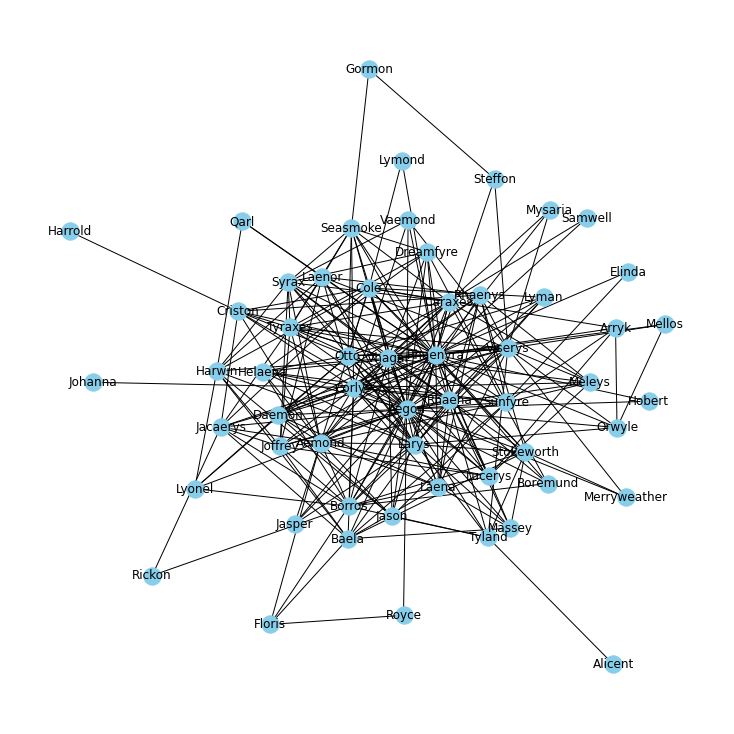

In [38]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

## Graph visualization - Pyvis

In [57]:
from pyvis.network import Network
net = Network(notebook = True, width="1400px", height="900px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
#disable animation/phisyques
net.toggle_physics(False)
net.show("hotd.html")

# The most important characters in House of The Dragon

In [58]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Aegon': 0.7090909090909091,
 'Rhaenys': 0.19999999999999998,
 'Vhagar': 0.39999999999999997,
 'Massey': 0.12727272727272726,
 'Stokeworth': 0.19999999999999998,
 'Rhaena': 0.3090909090909091,
 'Viserys': 0.36363636363636365,
 'Dreamfyre': 0.16363636363636364,
 'Lyman': 0.10909090909090909,
 'Merryweather': 0.05454545454545454,
 'Boremund': 0.09090909090909091,
 'Caraxes': 0.2909090909090909,
 'Meleys': 0.14545454545454545,
 'Corlys': 0.45454545454545453,
 'Laena': 0.19999999999999998,
 'Laenor': 0.19999999999999998,
 'Daemon': 0.19999999999999998,
 'Otto': 0.2727272727272727,
 'Rhaenyra': 0.7636363636363636,
 'Syrax': 0.23636363636363636,
 'Lymond': 0.03636363636363636,
 'Cole': 0.23636363636363636,
 'Harwin': 0.18181818181818182,
 'Lyonel': 0.09090909090909091,
 'Mysaria': 0.05454545454545454,
 'Johanna': 0.01818181818181818,
 'Helaena': 0.16363636363636364,
 'Aemond': 0.36363636363636365,
 'Criston': 0.18181818181818182,
 'Harrold': 0.01818181818181818,
 'Jason': 0.1454545454545454

<AxesSubplot:>

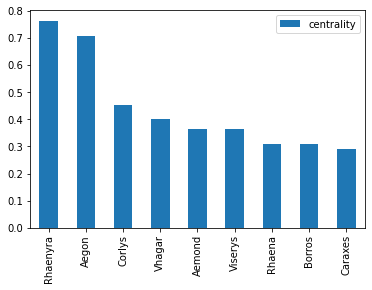

In [59]:

degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

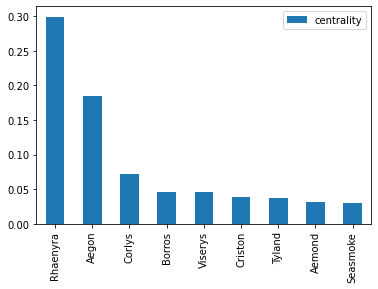

In [60]:

# Betweenness centrality in network
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

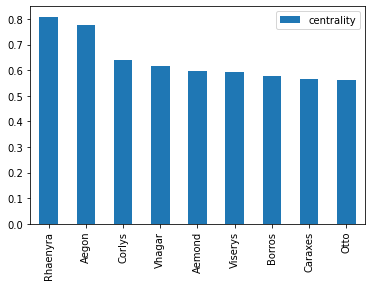

In [61]:

# Closeness centrality in network
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [62]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community detection

In [64]:
import community as community_louvain

In [65]:
communities = community_louvain.best_partition(G)

In [66]:
communities

{'Aegon': 0,
 'Rhaenys': 1,
 'Vhagar': 1,
 'Massey': 0,
 'Stokeworth': 0,
 'Rhaena': 2,
 'Viserys': 1,
 'Dreamfyre': 2,
 'Lyman': 4,
 'Merryweather': 0,
 'Boremund': 2,
 'Caraxes': 2,
 'Meleys': 1,
 'Corlys': 1,
 'Laena': 1,
 'Laenor': 3,
 'Daemon': 1,
 'Otto': 4,
 'Rhaenyra': 4,
 'Syrax': 2,
 'Lymond': 4,
 'Cole': 4,
 'Harwin': 3,
 'Lyonel': 3,
 'Mysaria': 2,
 'Johanna': 1,
 'Helaena': 4,
 'Aemond': 4,
 'Criston': 1,
 'Harrold': 1,
 'Jason': 4,
 'Qarl': 3,
 'Joffrey': 0,
 'Jacaerys': 0,
 'Lucerys': 0,
 'Baela': 0,
 'Tyraxes': 2,
 'Sunfyre': 4,
 'Larys': 4,
 'Vaemond': 1,
 'Mellos': 4,
 'Orwyle': 4,
 'Jasper': 4,
 'Steffon': 2,
 'Borros': 0,
 'Arryk': 4,
 'Seasmoke': 2,
 'Rickon': 0,
 'Floris': 0,
 'Samwell': 2,
 'Gormon': 2,
 'Tyland': 0,
 'Hobert': 4,
 'Elinda': 4,
 'Royce': 0,
 'Alicent': 0}

In [67]:
#set communities as group, PyVis will assign different colour to nodes
nx.set_node_attributes(G, communities, 'group')

In [76]:
com_net = Network(notebook = True, width="1200px", height="900px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)

#disable animation/phisyques
com_net.toggle_physics(False)
com_net.show("hotd_communities.html")